In [ ]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.optim as optim
import pandas as pd
import cv2
import os
import numpy as np
import pydicom as dicom
import pydicom.uid
import json
from sklearn.model_selection import train_test_split

In [ ]:
#make list for images and labels and add by collecting from each source
images = []
labels = []

#function to read images from sources 1,2,7
def get_images(path,condition):
    img_name = list(os.listdir(path))   # list of names
    for i in img_name:
        img_path = os.path.join(path,i)
        image = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)   # reading images
        image=cv2.resize(image,(28,28))
        image= image.reshape(1,28,28)
        images.append(image)               #adding images to images list
        labels.append(condition)           #adding respective labels to labels list

In [ ]:
#importing images from source 1,2,7
# it is given that images from all these sources are positive cases
# so we are using 1 for positive condition and 0 for negative
path = "C:/Users/Lenovo/OneDrive/Documents/CSProject/covid/Covid19action-radiology-CXR_v1.1/images"
path_1 = path+"/Source1"
path_2 = path+"/Source2"
path_7 = path+"/Source7"

# given these are positive cases from readme file
get_images(path_1,1)
get_images(path_2,1)
get_images(path_7,1)

In [ ]:
print(images[0].shape)
print(len(labels))

(1, 28, 28)
199


In [ ]:
#reading lalbels from jasom file and condition was given there

def img_from_json_and_other(path,name):
    img_name = list(os.listdir(path))
    #print(name)
    #print(img_name)
    for i in img_name:
        img_path = os.path.join(path,i)
        image = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image,(28,28))
        image = image.reshape(1,28,28)
        #print(img_path)
        if i in name:
            images.append(image)
            labels.append(name[i])

In [ ]:
# importing images from source 5
# it has its labels in json file

annotation_path="C:/Users/Lenovo/OneDrive/Documents/CSProject/Covid/annotations/annotation_file.json"
f = open(annotation_path,) 
data = json.load(f)  #data given in json file
filename=dict()
x=data['images']        #from 'images' list in json file we have information of images
for i in x:
    file=i['file_name']     #file name is id of the patient 
    type_covid=i['metadata']     #in metadata we have condition of patient
    if type_covid['finding']=='COVID_19':
        filename[file]=1
    else:
        filename[file]=0
        
path_5="C:/Users/Lenovo/OneDrive/Documents/CSProject/Covid/images"
img_from_json_and_other(path = path_5,name = filename)

In [ ]:
# in the same source 5 we have metadata.csv labelling file for remaining images
csv_path = "C:/Users/Lenovo/OneDrive/Documents/CSProject/Covid/metadata.csv"
names_file = pd.read_csv(csv_path,usecols=['filename','finding'])
filename2 = dict()
for i,row in names_file.iterrows():
    if row['finding'] == 'COVID-19':
        filename2[row["filename"]] = 1
    else:
        filename2[row["filename"]] = 0

img_from_json_and_other(path = path_5,name = filename2)

In [ ]:
#importing from
len(images)

1013

In [ ]:
#importing images from source_6 
#we have made a dictionary for storing name and condition of thee patient

filename3 = dict()
path_6 = "C:/Users/Lenovo/OneDrive/Documents/CSProject/covid/New folder/Figure1-COVID-chestxray-dataset-master"
names_file_2 = pd.read_csv(path_6+'/metadata.csv',usecols=['patientid','finding'])
for i,row in names_file_2.iterrows():
    if row['finding'] == 'COVID-19':
        filename3[row['patientid']+'.jpg'] = 1
    else:
        filename3[row['patientid']+'.jpg'] = 0

img_from_json(path = path_6+'/images',name = filename3)

In [ ]:
#importing images from source_3 (these are 3000 images which are left for testing in that dataset)
#these are images of pneumonia patients so we consider COVID-19 negative

path_3 = 'C:/Users/Lenovo/OneDrive/Documents/CSProject/covid/New folder (3)/images'

#make list for images and labels and add by collecting from each source
img_name = list(os.listdir(path_4))
l=0
#print(img_name)
for i in img_name:
    img_path = os.path.join(path_4,i)
    image = dicom.read_file(img_path )
    if image is not None:
        image=cv2.resize(image.pixel_array,(28,28))
        image= image.reshape(1,28,28)
        images.append(image)
        labels.append(0)


In [ ]:
len(labels)

4063

In [ ]:
#importing images from source_3 (these are 26000 images given for training in that dataset)
#these are images of pneumonia patients so we consider COVID-19 negative
path_3 = "C:/Users/Lenovo/OneDrive/Documents/CSProject/covid/New folder (4)"
img_name = list(os.listdir(path_6))
for i in img_name:
    img_path = os.path.join(path_6,i)
    image = dicom.read_file(img_path)
    if image is not None:
        image=cv2.resize(image.pixel_array,(28,28))
        image= image.reshape(1,28,28)
        images.append(image)
        labels.append(0)

In [ ]:
len(labels)

30747

In [ ]:
images_copy = images
labels_copy = labels

In [ ]:
from sklearn.model_selection import train_test_split

print(len(labels))
X_train, X_test, y_train, y_test = train_test_split(np.array(images), np.array(labels), test_size=0.20, random_state=42)
#as the images size is large their is no need to give more size to train
#we split data into 80:20 percent as train:test set

30747


In [ ]:
#converting these images to batches of 64
test_l= int (len(y_test)/64)
train_l= int (len(X_train)/64)
print(test_l)
train_x=[]
train_y=[]
test_x=[]
test_y=[]
for i in range(test_l):
    s=[]
    z=[]
    for e in range(64):
        s.append(X_test[((64*i)+e)])
        z.append(y_test[((64*i)+e)] )         
    test_x.append(s)
    test_y.append(z)
    
test_x=np.array(test_x)
test_y=np.array(test_y)

for i in range(train_l):
    s=[]
    z=[]
    for e in range(64):
        s.append(X_train[((64*i)+e)])
        z.append(y_train[((64*i)+e)])         
    train_x.append(s)
    train_y.append(z)
train_x=np.array(train_x)
train_y=np.array(train_y)

print(test_x.shape)
print(train_x.shape)
# here we convert test and train set of images and we used batch size of 64
# we have total 6150 test images and 26000 train images,we also randomly suffle the data



96
(96, 64, 1, 28, 28)
(384, 64, 1, 28, 28)


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch
class net(nn.Module):
  def __init__(self):
    super(net,self).__init__()
    self.conv1=nn.Conv2d(1,20,kernel_size=8,stride=2,padding=0)
    self.mpool1=nn.MaxPool2d(kernel_size=2,stride=1,padding=0)
    self.conv2=nn.Conv2d(20,40,kernel_size=4,stride=1,padding=0)
    self.mpool2=nn.MaxPool2d(kernel_size=2,stride=1,padding=0)
    self.fc1=nn.Linear(36*40,100)
    self.fc1_drop=nn.Dropout(0.2)
    self.fc2=nn.Linear(100,20)
    self.fc3=nn.Linear(20,2)         #output of 2 ()
  def forward(self,x):
    x = x.view(-1, 1, 28, 28) 
    x=self.conv1(x)
    x=F.relu(x)
    x=self.mpool1(x)
    x=self.conv2(x)
    x=F.relu(x)
    x=self.mpool2(x)
    x=x.view(-1,40*36)
    x=self.fc1(x)
    x=F.relu(x)
    x=self.fc1_drop(x)
    x=self.fc2(x)
    x=F.relu(x)
    x=self.fc3(x)
    x=F.log_softmax(x,dim=1)
    return x


In [ ]:
Net = net()
learning_rate=0.001
momentum=0.5
num_epochs=10   # it is not taking much epochs to reach the saturation so only 10 epochs are taken
# and it is taking so much time for single epoch
optimizer = optim.SGD(Net.parameters(), lr=learning_rate,
                      momentum=momentum)

In [ ]:
print(len(X_train))
print(len(X_test))

24597
6150


In [ ]:
criterion = nn.CrossEntropyLoss()
train_loss = []
train_acc = []


for epoch in range(num_epochs):
    
    running_loss = 0.0 
    running_corr = 0
        
    for i,data in enumerate(train_x):
        inputs1 = data
        labels1=train_y[i]
        inputs=torch.from_numpy(inputs1)
        label=torch.from_numpy(labels1)
               
        # Initializing model gradients to zero
        optimizer.zero_grad()
        # Data feed-forward through the network
        outputs = Net(inputs.float())
        # Predicted class is the one with maximum probability
        preds = torch.argmax(outputs,dim=1)
        # Finding the loss
        loss = F.nll_loss(outputs, label.long())
        # Calculating gradients
        loss.backward()
        optimizer.step()

        # Accumulating the loss for each batch
        running_loss += loss 
        # Accumulate number of correct predictions
        running_corr += torch.sum(preds==label.long())    
        
   
    # Calculating gradients
    
    # Updating the model parameters
   
        
    epoch_loss = running_loss.item()/(i+1)   #Total loss for one epoch
    epoch_acc = running_corr.item()/24597    #24597 are no. train cases
    
    
         
    train_loss.append(epoch_loss) #Saving the loss over epochs for plotting the graph
    train_acc.append(epoch_acc) #Saving the accuracy over epochs for plotting the graph

    print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training Accuracy: {:.4f}'.format(epoch+1,num_epochs,epoch_loss,epoch_acc*100))
       

Epoch 1/10 : Training loss: 0.1224 | Training Accuracy: 97.4224
Epoch 2/10 : Training loss: 0.1112 | Training Accuracy: 97.4550
Epoch 3/10 : Training loss: 0.1060 | Training Accuracy: 97.4550
Epoch 4/10 : Training loss: 0.1004 | Training Accuracy: 97.4875
Epoch 5/10 : Training loss: 0.0962 | Training Accuracy: 97.5322
Epoch 6/10 : Training loss: 0.0944 | Training Accuracy: 97.5322
Epoch 7/10 : Training loss: 0.0919 | Training Accuracy: 97.5810
Epoch 8/10 : Training loss: 0.0893 | Training Accuracy: 97.5932
Epoch 9/10 : Training loss: 0.0869 | Training Accuracy: 97.6583
Epoch 10/10 : Training loss: 0.0853 | Training Accuracy: 97.6664


In [ ]:
correct_pred = 0
for i in range(len(test_x)):
    input1=test_x[i]
    label1=test_y[i]
    inputs=torch.from_numpy(input1)
    labels=torch.from_numpy(label1)
       
    
    # Feedforward train data batch through model
    output = Net(inputs.float()) 
    # Predicted class is the one with maximum probability
    preds = torch.argmax(output,dim=1)
    correct_pred += torch.sum(preds==labels.long())

test_accuracy = correct_pred.item()/6150     # 6150 are no. testing cases
print('Testing accuracy = ',test_accuracy*100)



Testing accuracy =  97.85365853658536


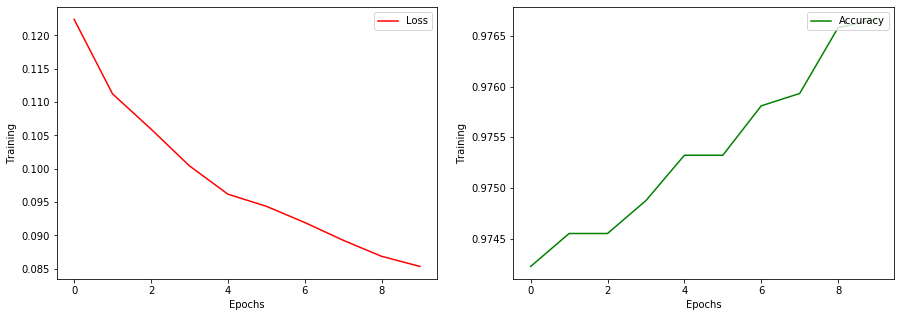

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[15,5]) 
plt.subplot(121)
plt.plot(range(num_epochs),train_loss,'r-',label='Loss') 
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Training')
plt.subplot(122)
plt.plot(range(num_epochs),train_acc,'g-',label='Accuracy') 
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Training')
plt.show()